In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv("students.csv")

# Drop irrelevant columns
df_processed = df.drop(columns=[ "StudentID","Name", "Email"])

# One-hot encode the categorical column "Department"
df_processed = pd.get_dummies(df_processed, columns=["Department"], drop_first=True)

# Define features (X) and target variable (y)
X = df_processed.drop(columns=["GPA"])
y = df_processed["GPA"]

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(X_train)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


     Age  GraduationYear  Department_Chemistry  Department_Computer Science  \
79    19            2030                     1                            0   
197   21            2025                     0                            0   
38    24            2024                     1                            0   
24    22            2026                     0                            1   
122   18            2030                     0                            0   
..   ...             ...                   ...                          ...   
106   20            2030                     0                            0   
14    23            2030                     0                            1   
92    23            2028                     1                            0   
179   18            2028                     0                            0   
102   24            2030                     0                            0   

     Department_Mathematics  Department_Physics  
7

Selected Features: Index(['Age', 'GraduationYear', 'Department_Chemistry',
       'Department_Computer Science', 'Department_Mathematics',
       'Department_Physics'],
      dtype='object')


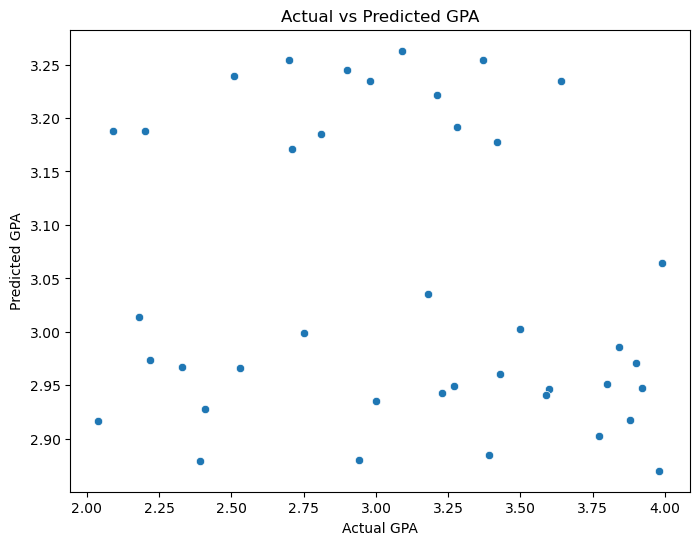

Mean Absolute Error (MAE): 0.54
Root Mean Squared Error (RMSE): 0.63


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

# Load the dataset
df = pd.read_csv("students.csv")

# Drop irrelevant columns
df_processed = df.drop(columns=["StudentID", "Name", "Email"])

# One-hot encode the categorical column "Department"
df_processed = pd.get_dummies(df_processed, columns=["Department"], drop_first=True)

# Define features (X) and target variable (y)
X = df_processed.drop(columns=["GPA"])
y = df_processed["GPA"]

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA")
plt.show()

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
